# Modeling Jet Stream Waviness 
### Alyssa Dellinger, Elliana Hebert, Katie-Rose Slade

## Introduction

The scientific theory and model of jet stream waviness plays a pivotal role in our understanding of atmospheric dynamics and climate patterns. The jet stream, a high-altitude, fast-flowing air current, is a key component of the Earth's atmospheric circulation. In recent years, researchers have been increasingly intrigued by the phenomenon of jet stream waviness, characterized by meandering patterns that deviate from the traditional straight and zonal flow. This waviness has been linked to a range of atmospheric and climatic phenomena, including extreme weather events, prolonged periods of heat or cold, and disruptions to regional weather patterns.

Understanding the factors influencing jet stream waviness is crucial for predicting and mitigating the impacts of climate change on a global scale. Scientists employ sophisticated models and theories to investigate the intricate interactions between atmospheric components, such as temperature gradients, pressure systems, and the Coriolis effect, which contribute to the development of jet stream waviness. This research not only enhances our ability to forecast weather patterns but also provides valuable insights into the broader implications of a changing climate on ecosystems, agriculture, and human societies.


## Equations

The principle equation we are to solve is the Linearized Planetary Geostrophic Motion model. This model is used to describe the large-scale motion of the atmosphere under the influence of the Earth's rotation. Ine the The equation is as follows:


$$\frac{\partial^2 \phi_{L}}{\partial z} - \frac{1}{H} \frac{\partial\phi_{L}}{\partial z} + \frac{\beta_{L}S}{U} \phi_{L}  = - \Biggl ({k_{S} +\frac{1}{H} \Biggl)}  \frac{Q_{0}}{U} F(x) e^{-k_{s}z}$$

The boundary conditions for the model are as follows:


$$ U \frac{\partial}{\partial x} \frac{\partial \phi_{L}}{\partial z} + Sw_{L}  = Q_{0} G(x)  e^{-k_{s}z}$$


$$ \Biggl ( \frac{\partial}{\partial z} - \frac{1}{H}\Biggl ) w_{L}  + Sw_{L}  = \beta_{L} \frac{\partial \phi_{L}}{\partial x}$$

Add more about what these equations mean...

## Numerical methods

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import math

#### Define Variables

In [27]:
#define parameters

k_s = 2
beta = 1
H = 0.5
S = 1
U = 1.5

q0 = 1 #??

def f(x):
    return np.sin(2*x)/2

def g(x):
    return np.cos(2*x)

#q = np.sqrt((1/(4*H**2))-((beta*S)/U))


## Results

In [28]:
#grid 

#alpha = 1
#
#xf = 1000
#zf = 1
#
#nx = 1000
#nz = 1000
#
#x = np.linspace(0,xf,nx)
#z = np.linspace(0,zf,nz)
#
#dx = x[1]-x[0]
#dz = z[1]-z[0]
#
##constant wavelength
#lam = np.ones(nw_L)
#lam = lam * (alpha*(dz)/dw_L)


#x(og)=z
#t(og)=x
D = 1 #diffusion constant, idk value
Cd= 0.1

xf = 1000
zf = 1000

nx = 1000
nz = 1000

x = np.linspace(0,xf,nx)
z = np.linspace(0,zf,nz)

dz = z[1]-z[0]
dx = (dz**2)*Cd/D


In [30]:
#prop matrix
#M is matrix of phi 

data = np.array([Cd*np.ones(nz), (1-2*Cd)*np.ones(nz), Cd*np.ones(nz)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nz, nz).toarray()

In [31]:
#Preallocate vectors

soln = np.zeros([nz,nx+1]) #solution matrix
soln_init = np.zeros([nz,1]) #initial conditions

In [32]:
#boundary conditions

M[0,0] = (q0*U)*f(x[0]) 
M[-1,-1] = (q0/U)*f(x[-1])*np.exp(-1*k_s)

In [33]:
#model

for k in range(0,nx):
    for i in range(0,nz):
        soln[i,k+1] = (dz**2)/(1+(dz/H))*((k+(1/H))*(q0/U)*f(x[k])*np.exp(-1*k_s*z[i])-(1/H)*(soln[i,k]/dz)
                                          +((beta*S)/U)*soln[i,k]+2*soln[i,k]-soln[i-1,k])
    soln_new = np.matmul(M,soln[:,k])
    soln[:,k+1] = soln_new.transpose()


 ...]

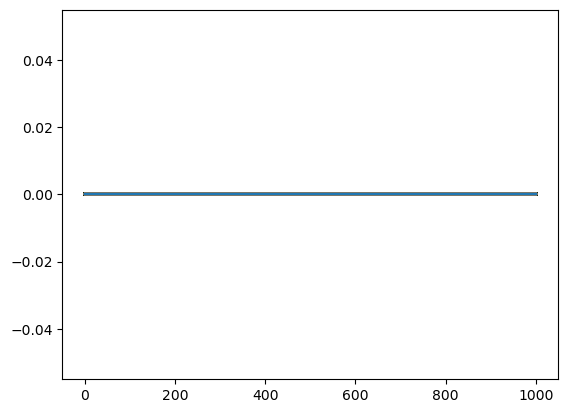

In [35]:
plt.plot(z,soln)

## Figures

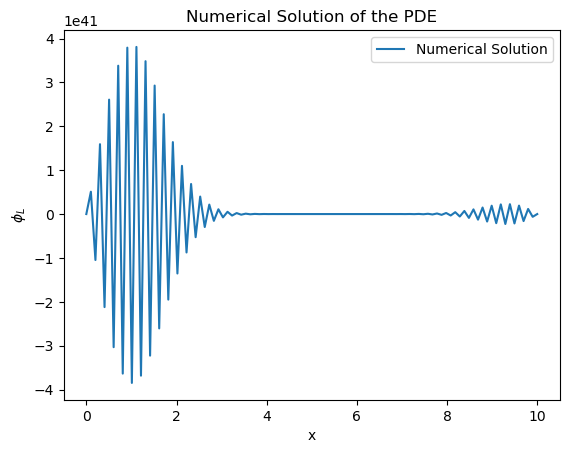

In [10]:
#chat gpt's solution - don't know whether it is useful

import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1000.0  # Length of the domain
T = 1.0   # Final time
Nx = 100   # Number of spatial grid points
Nt = 100   # Number of time steps

# Spatial and temporal discretization
dx = L / (Nx - 1)
dt = T / Nt

# Constants
H = 0.5     # Characteristic vertical scale
beta_L = 1.0
S = 1.0
U = 1.5     # Characteristic horizontal velocity scale
k_S = 2.0
Q0 = 1.0

# Initial condition
def initial_condition(x):
    return np.sin(np.pi * x / L)

# Initialize grid
x_values = np.linspace(0, L, Nx)
phi_L = initial_condition(x_values)

# Time-stepping loop
for n in range(1, Nt + 1):
    # Compute the right-hand side
    RHS = -((k_S + 1 / H) * Q0 / U) * np.exp(-k_S * x_values)

    # Update phi_L using finite difference scheme
    phi_L[1:-1] = phi_L[1:-1] + dt * (
        (phi_L[2:] - 2 * phi_L[1:-1] + phi_L[:-2]) / dx**2
        - (1 / H) * (phi_L[2:] - phi_L[:-2]) / (2 * dx)
        + (beta_L * S / U) * phi_L[1:-1]
        + RHS[1:-1]
    )

# Plot the result
plt.plot(x_values, phi_L, label='Numerical Solution')
plt.title('Numerical Solution of the PDE')
plt.xlabel('x')
plt.ylabel('$\phi_L$')
plt.legend()
plt.show()


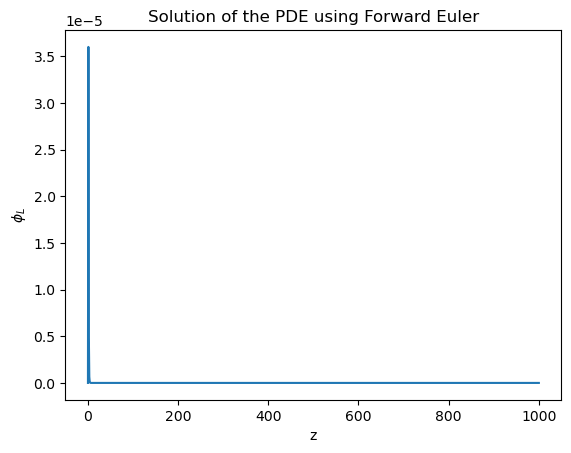

In [21]:
#chatgpt part 2

import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = 0.5  # Example value for H, you should adjust according to your problem
beta_L = 1.0  # Example value for beta_L
k_S = 2.0  # Example value for k_S
Q0 = 1.0  # Example value for Q0
U = 1.5  # Example value for U

# Spatial parameters
L = 1000.0  # Total length
Nx = 1000  # Number of spatial grid points
dx = L / (Nx - 1)  # Spatial step size
x_values = np.linspace(0, L, Nx)

# Time parameters
T = 1.0  # Total time
Nt = 100  # Number of time steps
dt = T / (Nt - 1)  # Time step size

# Initial conditions
phi_L = (Q0 / U) * (np.sin(2 * x_values) / 2)

# Forward Euler method
for n in range(1, Nt):
    phi_L_new = np.zeros_like(phi_L)

    for i in range(1, Nx - 1):
        dz = (dt ** 2) / (1 + (dt / H))
        source_term = (k_S + 1 / H) * (Q0 / U) * np.exp(-k_S * x_values[i])

        phi_L_new[i] = dz * (
            source_term
            - (1 / H) * (phi_L[i] - phi_L[i - 1]) / dx
            + (beta_L * S / U) * phi_L[i]
            + 2 * phi_L[i]
            - phi_L[i - 1]
        )

    phi_L = phi_L_new

# Plot the result
plt.plot(x_values, phi_L)
plt.title("Solution of the PDE using Forward Euler")
plt.xlabel("z")
plt.ylabel("$\phi_L$")
plt.show()


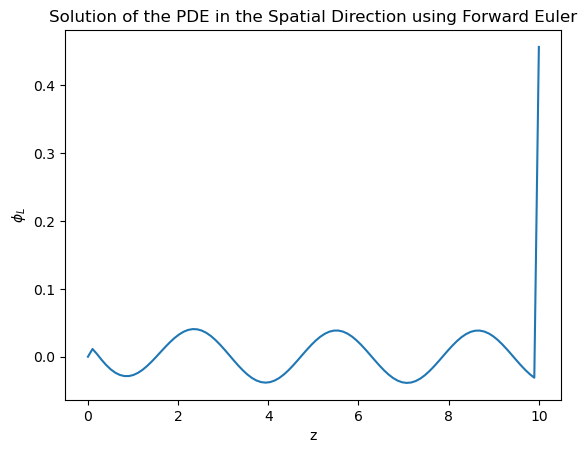

In [22]:
#chatgpt pt 3

import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = 1.0  # Example value for H, you should adjust according to your problem
beta_L = 1.0  # Example value for beta_L
k_S = 1.0  # Example value for k_S
Q0 = 1.0  # Example value for Q0
U = 1.0  # Example value for U
S = 1.0  # Example value for S

# Spatial parameters
L = 10.0  # Total length
Nx = 100  # Number of spatial grid points
dx = L / (Nx - 1)  # Spatial step size
x_values = np.linspace(0, L, Nx)

# Initial conditions
phi_L = (Q0 / U) * (np.sin(2 * x_values) / 2)

# Forward Euler method (spatial only)
for i in range(1, Nx - 1):
    dz = dx ** 2  # Adjust the step size as needed
    source_term = (k_S + 1 / H) * (Q0 / U) * np.exp(-k_S * x_values[i])

    phi_L[i] = dz * (
        source_term
        - (1 / H) * (phi_L[i] - phi_L[i - 1]) / dx
        + (beta_L * S / U) * phi_L[i]
        + 2 * phi_L[i]
        - phi_L[i - 1]
    )

# Plot the result
plt.plot(x_values, phi_L)
plt.title("Solution of the PDE in the Spatial Direction using Forward Euler")
plt.xlabel("z")
plt.ylabel("$\phi_L$")
plt.show()


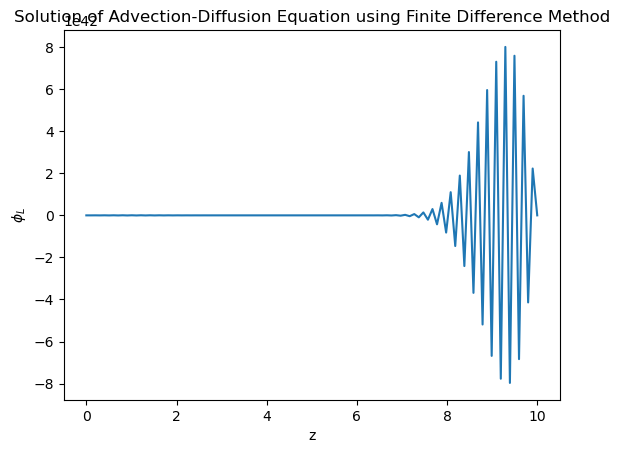

In [23]:
#chatgpt pt 4

import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = 1.0  # Example value for H, you should adjust according to your problem
beta_L = 1.0  # Example value for beta_L
k_S = 1.0  # Example value for k_S
Q0 = 1.0  # Example value for Q0
U = 1.0  # Example value for U
S = 1.0  # Example value for S

# Spatial parameters
L = 10.0  # Total length
Nx = 100  # Number of spatial grid points
dx = L / (Nx - 1)  # Spatial step size
x_values = np.linspace(0, L, Nx)

# Time parameters
T = 1.0  # Total time
Nt = 100  # Number of time steps
dt = T / (Nt - 1)  # Time step size

# Advection and diffusion coefficients
u = -1 / H
D = (beta_L * S) / U

# Initial conditions
phi_L = (Q0 / U) * (np.sin(2 * x_values) / 2)

# Finite Difference Method
for n in range(1, Nt):
    phi_L_new = np.zeros_like(phi_L)

    for i in range(1, Nx - 1):
        # Advection term
        adv = u * (phi_L[i + 1] - phi_L[i - 1]) / (2 * dx)

        # Diffusion term
        diff = D * (phi_L[i + 1] - 2 * phi_L[i] + phi_L[i - 1]) / (dx**2)

        # Source term
        source_term = S

        # Update using finite difference method
        phi_L_new[i] = phi_L[i] + dt * (adv + diff + source_term)

    phi_L = phi_L_new

# Plot the result
plt.plot(x_values, phi_L)
plt.title("Solution of Advection-Diffusion Equation using Finite Difference Method")
plt.xlabel("z")
plt.ylabel("$\phi_L$")
plt.show()


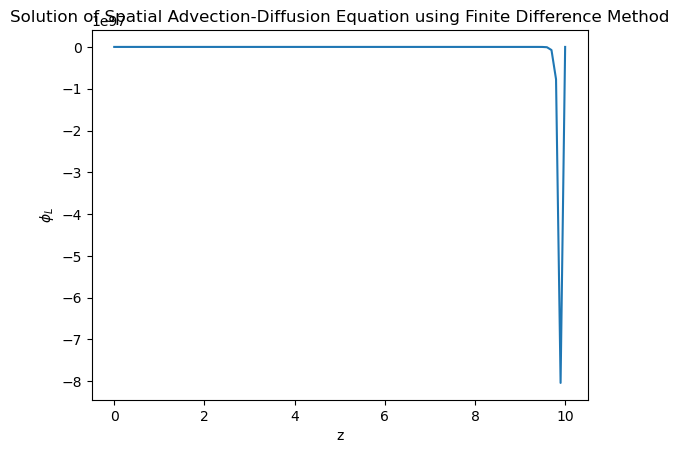

In [24]:
#chatgpt 5

import numpy as np
import matplotlib.pyplot as plt

# Parameters
H = 1.0  # Example value for H, you should adjust according to your problem
beta_L = 1.0  # Example value for beta_L
k_S = 1.0  # Example value for k_S
Q0 = 1.0  # Example value for Q0
U = 1.0  # Example value for U
S = 1.0  # Example value for S

# Spatial parameters
L = 10.0  # Total length
Nx = 100  # Number of spatial grid points
dx = L / (Nx - 1)  # Spatial step size
x_values = np.linspace(0, L, Nx)

# Advection and diffusion coefficients
u = -1 / H
D = (beta_L * S) / U

# Initial conditions
phi_L = (Q0 / U) * (np.sin(2 * x_values) / 2)

# Finite Difference Method (spatial only)
for i in range(1, Nx - 1):
    # Advection term
    adv = u * (phi_L[i + 1] - phi_L[i - 1]) / (2 * dx)

    # Diffusion term
    diff = D * (phi_L[i + 1] - 2 * phi_L[i] + phi_L[i - 1]) / (dx**2)

    # Source term
    source_term = - (k_S + 1 / H) * (Q0 / U) * np.exp(-k_S * x_values[i]) * (np.sin(2 * x_values[i]) / 2)

    # Update using finite difference method
    phi_L[i] = phi_L[i] + dx * (adv + diff + source_term)

# Plot the result
plt.plot(x_values, phi_L)
plt.title("Solution of Spatial Advection-Diffusion Equation using Finite Difference Method")
plt.xlabel("z")
plt.ylabel("$\phi_L$")
plt.show()
